## Implementation of Logistic Regression Algorithm

The goal of this project is to build a machine learning algorithm for classifier problem. The Classifier should take any number of features i.e. multivariate dataset and will be predict the classes of multiclass labels. Here I have chosen to implement the Logistic Regression Classification Algorithm as it is easy to implement, and we can extend the concept of Linear Regression to build the same. To minimise the cost function, I am using classic Gradient Descent Algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D

#### Read the Data
<b>File Details</b><br>

•	Each line describes one type of Owl found in Ireland: body-length, wing-length, body-width, wing-width, type <br>
•	There are three types: Barn Owl, Snowy Owl & Long-Eared Owl. Your classifier is to distinguish between them.

In [2]:
data_raw_owl = pd.read_csv("owls.csv", names = ["body-length", "wing-length", "body-width", "wing-width", "type"])
data_raw_owl.head()

,body-length,wing-length,body-width,wing-width,type
0,3.0,5.0,1.6,0.2,LongEaredOwl
1,3.2,4.7,1.6,0.2,LongEaredOwl
2,3.4,4.6,1.4,0.3,LongEaredOwl
3,3.6,5.0,1.4,0.2,LongEaredOwl
4,4.1,5.2,1.5,0.1,LongEaredOwl


<b>Visualise</b> the data through both 2D and 3D Scattar Plots

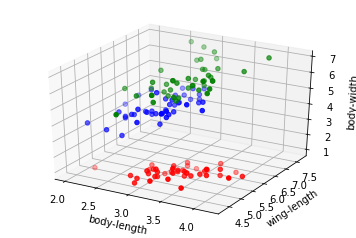

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs1 = data_raw_owl["body-length"][data_raw_owl["type"] == "LongEaredOwl"]
ys1 = data_raw_owl["wing-length"][data_raw_owl["type"] == "LongEaredOwl"]
zs1 = data_raw_owl["body-width"][data_raw_owl["type"] == "LongEaredOwl"]
ax.scatter(xs1,ys1,zs1, c='r')

xs2 = data_raw_owl["body-length"][data_raw_owl["type"] == "SnowyOwl"]
ys2 = data_raw_owl["wing-length"][data_raw_owl["type"] == "SnowyOwl"]
zs2 = data_raw_owl["body-width"][data_raw_owl["type"] == "SnowyOwl"]
ax.scatter(xs2,ys2,zs2, c='g')

xs3 = data_raw_owl["body-length"][data_raw_owl["type"] == "BarnOwl"]
ys3 = data_raw_owl["wing-length"][data_raw_owl["type"] == "BarnOwl"]
zs3 = data_raw_owl["body-width"][data_raw_owl["type"] == "BarnOwl"]
ax.scatter(xs3,ys3,zs3, c='b')

ax.set_xlabel('body-length')
ax.set_ylabel('wing-length')
ax.set_zlabel('body-width')

#Scattar Plot in 3D Plane

plt.show()

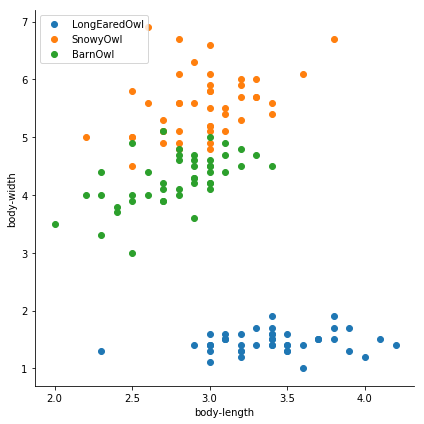

In [4]:
#Plot with respect to body-length
sepalPlt = sb.FacetGrid(data_raw_owl, hue="type", size=6).map(plt.scatter, "body-length", "body-width")
plt.legend(loc='upper left');
plt.show()

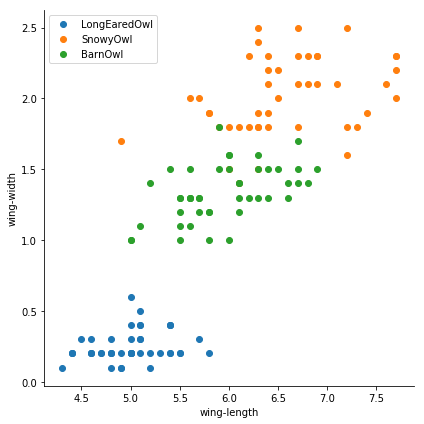

In [5]:
#Plot with respect to wing-length
sepalPlt = sb.FacetGrid(data_raw_owl, hue="type", size=6).map(plt.scatter, "wing-length", "wing-width")
plt.legend(loc='upper left');
plt.show()

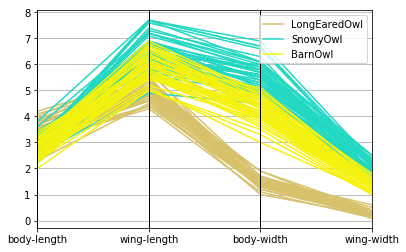

In [6]:
#Plot through Parallel Coordinates
parallel_coordinates(data_raw_owl, "type");
plt.show()

## Build the Logistic Regressor Classifier

#### Design Decision and Specifications : 

Class : LogisticRegressor(alpha = 0.5, iterations = 15000, tol=1e-8)

Parameters:  
<pre>alpha : learning rate </pre>
<pre>iterations : Maximum Number of Iterations for the Gradient Descent Iterations </pre>
<pre>tol : maximum tolerance level for the cost function</pre>

Methods:
Build the Model with the Training Data  
<pre>fit (X,Y) - </pre>
      - Parameters :  
        X : {array-like, sparse matrix}, shape (m, n)
        -	Training  Feature Vector where m is the number of sample and n is the number of features
        Y : array-like, shape (m,)
        -	Target (Dependent Variables) Vector Relative to X
        Returns :
            self : object  
    
    predict(X) – 
    
        Parameters : 
        X : {array-like, sparse matrix}, shape (m, n)
        -	Test  Feature Vector where m is the number of sample and n is the number of features
        Returns :
        array, shape(m)
        -	Predicted Class Label per sample

Pre-Requisites: 

* Code needs to be run in python 3.5 Or above as few functionalities used is only available in it.
* Before running the Class python library numpy needs to be imported as np


In [7]:
# Class for Logistic Regression
class LogisticRegressor:
    
    # Defining Sigmoid Function
    def __sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    # Defining the Gradient Function (partial derivative of the Cost Function)
    # This will be used further to calculate the Gradient Descent
    # X.T -> Transpose of X 
    # X @ theta -> Matrix Multiplication of X and Theta in Python 3.5 or above
    # If using older version replace by np.matmul
    def __gradient(self,theta, X, y,m):
        return ((1/m) * X.T @ (self.__sigmoid( X @ theta) - y))
   
   # Defining the Cost Function which will be used to check the tolerence
    def __costFunction(self,theta, X, y,m):
        J = (-1/m) * np.sum(np.multiply(y, np.log(self.__sigmoid(X @ theta))) + 
                            np.multiply((1-y), np.log(1 - self.__sigmoid(X @ theta))))
        return J
    
    # Defining the Gradient Descent
    def __gradientDescent(self,X, y, theta, alpha, iterations, tol,m):
        lastCost = self.__costFunction(theta, X, y,m)
        for _ in range(iterations):
            # Compute the new Theta 
            theta = theta - ((alpha) * self.__gradient(theta, X, y,m))
            # Compute the cost with the new Theta
            currentCost = self.__costFunction(theta, X, y,m)
            # Break if the Cost become less than the Tolerence Level
            if((lastCost - currentCost) > tol):
                lastCost = currentCost
            else:
                break
        return theta

    # Default Constructor
    def __init__(self, alpha = 0.5, iterations = 15000, tol=1e-8):
        self.__alpha = alpha
        self.__iter = iterations
        self.__tol = tol
        print("Regressor(alpha : {0}, iteration : {1}, tolerence : {2})".format(alpha, iterations, tol))
    
    # Method fit to Train the Model
    def fit(self,X,Y):
        labels = sorted(set(Y))
        self.__dict_label = {} # Save the Distinct Labels
        self.__label_type = type(Y[0]) # Get the Label Type Dynamically
        k=0
        (m, n) = X.shape
        X = np.hstack((np.ones((m,1)), X)) # Add the bias Term X0 with default value 1
        theta = np.zeros((n+1,1)) # Intializing theta with all zeros
        X = X.astype(float)
        theta = theta.astype(float)
        theta_opt = np.empty(shape=[n+1, 0]) # Create an empty matrix to store the theta optimials
        while k < len(labels):
            self.__dict_label[(self.__label_type)(k)] = labels[k] # Store the Labels in Dict
            
            # Set True for a particular label and False for others 
            # This Convert to a Binary Classifier
            Y_ind = (Y == labels[k] )*1
            Y_ind = Y_ind[:, np.newaxis]

            # Calculate the theta optimal for current Class through Gradient Descent
            value = self.__gradientDescent(X, Y_ind, theta, self.__alpha, self.__iter, self.__tol,m)
            theta_opt = np.hstack((theta_opt,value)) # Store the Theta Optimal for Current label
            k += 1
        
        self.__theta_optimized = theta_opt # Store the Theta Optimised for all variables and Labels in a matrix Form
    
    def predict(self,X_test):
        (mt, nt) = X_test.shape
        X_test_new = np.hstack((np.ones((mt,1)), X_test)) # Add the bias Term X0 with default value 1

        # Calculate the Probablity of Individual Class in Vectorised Form
        prob_new = self.__sigmoid(X_test_new.astype(float) @ self.__theta_optimized.astype(float))

        # Get the Maximum Probablity Class
        pred = prob_new.argmax(axis=1)

        # Replace the label Classes with the Original Label Values
        pred = pred.astype(self.__label_type)

        j=0
        for i in pred:
            pred[j] = self.__dict_label[i]
            j += 1

        return pred

Starting Iterations.......



********* Iteration - 1 **********

Regressor(alpha : 0.01, iteration : 15000, tolerence : 1e-08)

Accuracy:  95.56 


********* Iteration - 2 **********

Regressor(alpha : 0.01, iteration : 15000, tolerence : 1e-08)

Accuracy:  100.0 


********* Iteration - 3 **********

Regressor(alpha : 0.01, iteration : 15000, tolerence : 1e-08)

Accuracy:  97.78 


********* Iteration - 4 **********

Regressor(alpha : 0.01, iteration : 15000, tolerence : 1e-08)

Accuracy:  95.56 


********* Iteration - 5 **********

Regressor(alpha : 0.01, iteration : 15000, tolerence : 1e-08)

Accuracy:  95.56 


********* Iteration - 6 **********

Regressor(alpha : 0.01, iteration : 15000, tolerence : 1e-08)

Accuracy:  97.78 


********* Iteration - 7 **********

Regressor(alpha : 0.01, iteration : 15000, tolerence : 1e-08)

Accuracy:  91.11 


********* Iteration - 8 **********

Regressor(alpha : 0.01, iteration : 15000, tolerence : 1e-08)

Accuracy:  97.78 


********* Iteratio

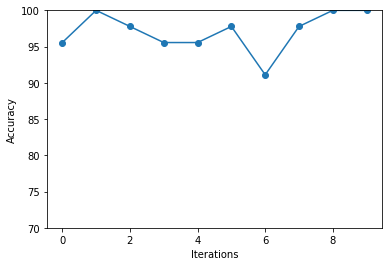

In [8]:
# Iterate 10 Times with Random Traing Test Set to calculate the accuracies
iter = 10
print("Starting Iterations.......\n\n")

accuracies = []
for i in range(iter):
    #print("\n********* Iteration - {0} **********\n".format(i+1),file=f)
    print("\n********* Iteration - {0} **********\n".format(i+1))
    data_raw_array = np.array(data_raw_owl)
    np.random.shuffle(data_raw_array) # Random Suffle
    div =  int(len(data_raw_array)*2/3)
    training, test = data_raw_array[:div,:], data_raw_array[div:,:] # Divide Train Test Case

    X_train = training[:,0:4] # Train Features
    Y_train = training[:,4] # Train Labels

    X_test = test[:,0:4] # Test Features
    Y_test = test[:,4] # Test Labels

    # Create Object of Logistic Regressor
    c1 = LogisticRegressor(alpha =0.01)

    # Train The Model
    c1.fit(X_train,Y_train)

    # Predict with the Test Features
    pred = c1.predict(X_test)
    

#     print(pd.concat([pd.DataFrame(Y_test, columns=["Actual"]),
#     pd.DataFrame(pred, columns = ["Predicted"])],axis=1),file = f)
    
    # Calculate The Accuracy
    acc = round(100 * np.mean(pred == Y_test),2) 
    accuracies.append(acc)
    print("\nAccuracy: ",acc,"\n")
#     print("\nAccuracy: ",acc,"\n", file=f)

# print("\n *********************************\n",file=f)
#print("Output File path : {0}".format(os.getcwd()),"\n")
print("Average accuracy : ",round(np.mean(accuracies),2),"\n")
# print("\nAverage accuracy : ",round(np.mean(accuracies),2),file=f)

# Plot the Accuracy 

plt.plot(range(0,10),accuracies,  linestyle='-', marker='o')
plt.ylim([70, 100])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

<b>Test the Classifier on an external Dataset, here we are using the Digits dataset under the Scikit Learn Package </b>

In [9]:
from sklearn import datasets
digits = datasets.load_digits()

data_raw_digits = pd.DataFrame(data= np.c_[digits['data'], digits['target']])

iter = 2
for _ in range(iter):
    data_raw_array = np.array(data_raw_digits)
    np.random.shuffle(data_raw_array)
    div =  int(len(data_raw_array)*2/3)
    training, test = data_raw_array[:div,:], data_raw_array[div:,:]

    X_train = training[:,0:60]
    X_train_normal = 2*(X_train - np.min(X_train))/np.ptp(X_train)-1
    Y_train = training[:,64]

    X_test = test[:,0:60]
    X_test_normal = 2*(X_test - np.min(X_test))/np.ptp(X_test)-1
    Y_test = test[:,64]

    c1 = LogisticRegressor(alpha =0.05)
    c1.fit(X_train_normal,Y_train)

    pred = c1.predict(X_test_normal)
#     print(pred)
#     print(Y_test)
    print("Accuracy: ",100 * np.mean(pred == Y_test))
    print("***************************************************")

Regressor(alpha : 0.05, iteration : 15000, tolerence : 1e-08)
Accuracy:  96.4941569282
***************************************************
Regressor(alpha : 0.05, iteration : 15000, tolerence : 1e-08)
Accuracy:  96.32721202
***************************************************
